### Monte Carlo Integration

Monte Carlo integration approximates an integral by interpreting it as an **expected value**. For an integral over an interval $[a, b]$:

\begin{equation}
\int_a^b f(x) \, dx,
\end{equation}

we can approximate this by sampling $x$ uniformly in $[a, b]$ and computing the expectation:

\begin{equation}
\int_a^b f(x) \, dx \approx (b - a) \cdot \mathbb{E}_{x \sim \text{Uniform}(a, b)}[f(x)] = \frac{b - a}{N} \sum_{i=1}^N f(x_i),.
\end{equation}

This is achieved by taking multiple uniform samples of $x$, evaluating $f(x)$ at each, averaging the results, and scaling by the interval width $(b - a)$

**Convergence in  $\mathbb{R}^n$**: The order of convergence remains $O\left(\frac{1}{\sqrt{N}}\right)$ regardless of the dimension $n$, unlike grid-based methods that suffer from exponential growth in computational cost (the "curse of dimensionality").

Integration results for f(x) = x^2 over [0, 2]:
Exact Solution: 2.6666666666666665

   N (Samples)  Trapezium Result  Monte Carlo Result
0           10          2.683128            3.146887
1           50          2.667222            2.902621
2          100          2.666803            2.372404
3          500          2.666672            2.725254
4         1000          2.666668            2.723889
5         5000          2.666667            2.685674
6        10000          2.666667            2.718095
7       100000          2.666667            2.668150

   N (Samples)  Trapezium Error  Monte Carlo Error
0           10     1.646091e-02           0.480220
1           50     5.553242e-04           0.235955
2          100     1.360405e-04           0.294263
3          500     5.354731e-06           0.058587
4         1000     1.336004e-06           0.057223
5         5000     5.335467e-08           0.019008
6        10000     1.333600e-08           0.051429
7       100000     1.333360e-1

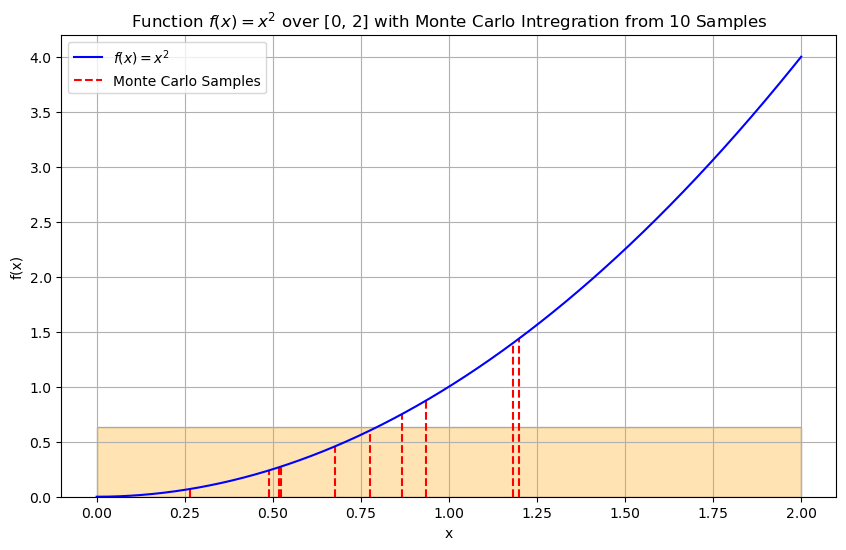

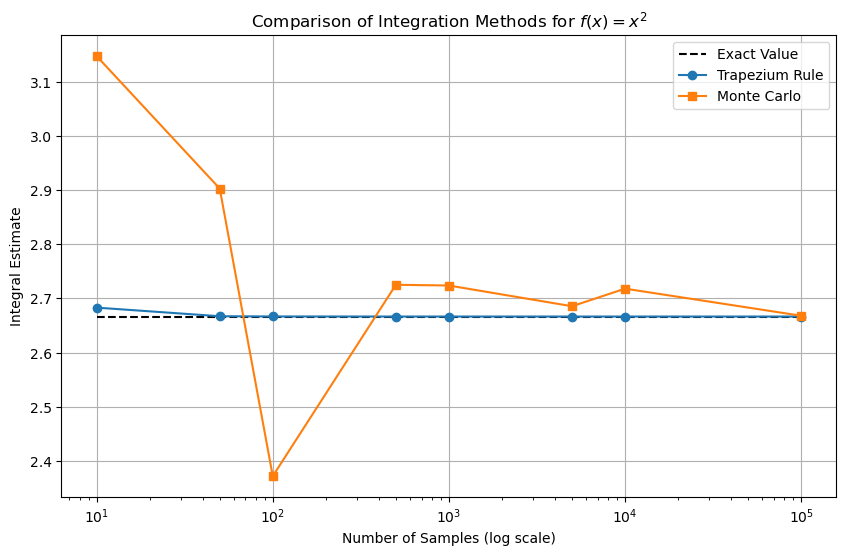

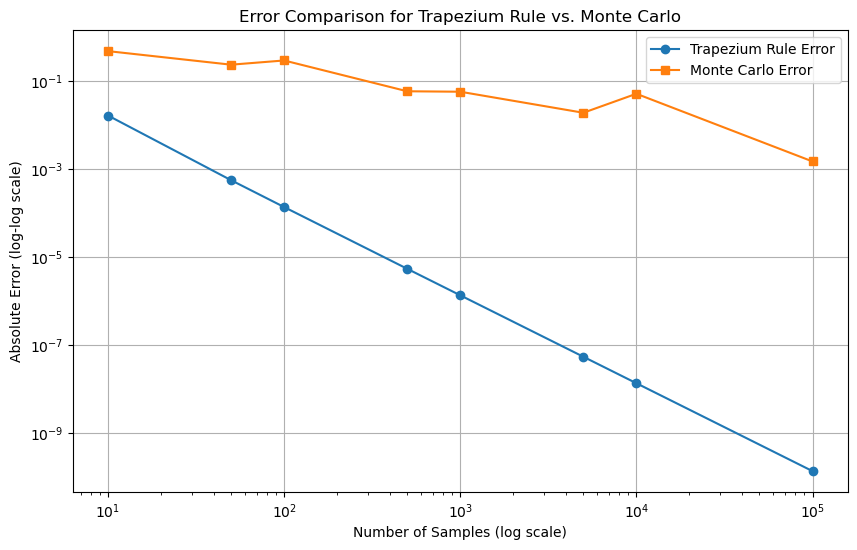

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def exact_integral_x2(a, b):
    """Calculate the exact integral of x^2 over [a, b]."""
    return (b**3 / 3) - (a**3 / 3)

def trapezium_rule_x2(a, b, N):
    """Approximate the integral of x^2 over [a, b] using the trapezium rule."""
    x = np.linspace(a, b, N)
    h = (b - a) / (N - 1)
    f_x = x**2
    integral = h * (0.5 * f_x[0] + np.sum(f_x[1:-1]) + 0.5 * f_x[-1])
    return integral

def monte_carlo_x2(a, b, N):
    """Approximate the integral of x^2 over [a, b] using Monte Carlo sampling."""
    samples = np.random.uniform(a, b, N)
    f_samples = samples**2
    integral = (b - a) * np.mean(f_samples)
    return integral

# Define the interval and the exact solution for comparison
a, b = 0, 2  # Integrate over [0, 2]
exact_value = exact_integral_x2(a, b)

# Number of samples for Monte Carlo and trapezium rule
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 100000]

# Arrays to store results
trapezium_results = []
monte_carlo_results = []
trapezium_errors = []
monte_carlo_errors = []

for N in sample_sizes:
    # Trapezium rule integration
    trapezium_result = trapezium_rule_x2(a, b, N)
    trapezium_results.append(trapezium_result)
    trapezium_errors.append(abs(trapezium_result - exact_value))

    # Monte Carlo integration
    monte_carlo_result = monte_carlo_x2(a, b, N)
    monte_carlo_results.append(monte_carlo_result)
    monte_carlo_errors.append(abs(monte_carlo_result - exact_value))

# Display results in a structured format
results_df = pd.DataFrame({
    'N (Samples)': sample_sizes,
    'Trapezium Result': trapezium_results,
    'Monte Carlo Result': monte_carlo_results,
})

results_df_errors = pd.DataFrame({
    'N (Samples)': sample_sizes,
    'Trapezium Error': trapezium_errors,
    'Monte Carlo Error': monte_carlo_errors
})

print("Integration results for f(x) = x^2 over [0, 2]:")
print("Exact Solution:", exact_value)
print("")
print(results_df)
print("")
print(results_df_errors)

# Plot 1: Function f(x) = x^2 with a single Monte Carlo rectangle
x_vals = np.linspace(a, b, 1000)
f_x_vals = x_vals**2

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_x_vals, label=r'$f(x) = x^2$', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function $f(x) = x^2$ over [0, 2] with Monte Carlo Intregration from 10 Samples')

# Generate 10 random samples for the Monte Carlo estimate
N_samples = 10
samples = np.random.uniform(a, b, N_samples)
sample_heights = samples**2
average_height = np.mean(sample_heights)
width = b - a

# Draw the Monte Carlo rectangle
plt.bar((a + b) / 2, average_height, width=width, color='orange', edgecolor='black', alpha=0.3, align='center', label='Monte Carlo Sample Mean')

# Add vertical dotted lines for each sample
for sample_x, sample_y in zip(samples, sample_heights):
    plt.vlines(sample_x, ymin=0, ymax=sample_y, color='red', linestyle='--')  # Vertical lines for sample points

# Legend and grid
plt.legend(['$f(x) = x^2$', 'Monte Carlo Samples'])
plt.grid(True)
plt.show()

# Plot 2: Comparison of Integration Results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, [exact_value] * len(sample_sizes), 'k--', label='Exact Value')
plt.plot(sample_sizes, trapezium_results, 'o-', label='Trapezium Rule')
plt.plot(sample_sizes, monte_carlo_results, 's-', label='Monte Carlo')
plt.xscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Integral Estimate')
plt.title('Comparison of Integration Methods for $f(x) = x^2$')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Error Comparison
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, trapezium_errors, 'o-', label='Trapezium Rule Error')
plt.plot(sample_sizes, monte_carlo_errors, 's-', label='Monte Carlo Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Absolute Error (log-log scale)')
plt.title('Error Comparison for Trapezium Rule vs. Monte Carlo')
plt.legend()
plt.grid(True)
plt.show()


### Monte Carlo Integration General case

In the general case, if $ f(x) $ is integrated over a domain $ D $ using a probability density function (pdf) $ p(x) $ defined on $ D $, the Monte Carlo approximation becomes:

\begin{equation}
\int_D f(x) \, dx \approx \mathbb{E}_{x \sim p(x)} \left[ \frac{f(x)}{p(x)} \right] = \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{p(x_i)},
\end{equation}

where $x_i$ are samples drawn from the distribution with density $p(x)$, and $N$ is the total number of samples. 

Substituting in the pdf for the uniform distribution between $a$ and $b$:

\begin{equation}
p(x) = 
\begin{cases}
\frac{1}{b - a}, & \text{if } a \leq x \leq b, \\
0, & \text{otherwise}.
\end{cases}
\end{equation}

it can be seen how the Monte Carlo Integration for uniform distributions is formed.

The ability to choose the pdf allows for **importance sampling**, where $p(x)$ is chosen to concentrate samples in regions where $f(x)$ is large, improving the approximation's efficiency.

### Using Probability Density Functions for Importance Sampling

While uniform sampling works well for simple functions, **importance sampling** can significantly improve efficiency for integrals of functions with non-uniform behavior. Importance sampling uses a sampling distribution that closely matches the shape of the integrand, allowing for more accurate estimates with fewer samples by focusing on regions where $f(x)$ is large.

For instance, if $f(x)$ has a peak around certain values, using a **Gaussian distribution** centered on that peak will place more samples in critical regions, increasing the precision of the estimate. The Monte Carlo approximation for an integral of $f(x)$ can be written as:

\begin{equation}
\int_{-\infty}^{\infty} f(x) \, dx \approx \frac{1}{N} \sum_{i=1}^N f(x_i) \times \frac{1}{p(x_i)},
\end{equation}

where $p(x)$ is the probability density function of the chosen sampling distribution, such as a Gaussian distribution. This approach allows the estimator to adjust for non-uniform sampling, concentrating samples in regions that contribute the most to the integral.

### Example: Integrating $f(x) = Ae^{-Bx^2}$ Using Gaussian Importance Sampling

Let’s consider the function $f(x) = Ae^{-Bx^2}$, which has a peak at $x = 0$ and decays rapidly for large $|x|$. Integrating $f(x)$ over $[-\infty, \infty]$ yields $\sqrt{\pi}$. However, integrating this over a finite interval (e.g., $[-5, 5]$) approximates the result closely due to the rapid decay of $f(x)$.

Using importance sampling with a Gaussian distribution $\mathcal{N}(0, 1)$ aligns well with the behavior of $f(x)$. The approximation becomes:

\begin{equation}
\int_{-\infty}^{\infty} e^{-x^2} \, dx \approx \frac{1}{N} \sum_{i=1}^N Ae^{-Bx_i^2} \times \frac{1}{p(x_i)},
\end{equation}

where $p(x)$ is a Gaussian PDF. The term $ f(x) / p(x$ adjusts each sample to reflect its contribution under the Gaussian distribution, resulting in a more efficient and accurate approximation of the integral. This approach, known as **importance sampling**, reduces variance by focusing on the most significant regions of $f(x)$, often leading to faster convergence.

Integration results for $f(x) = 5 e^{-5 x^2}$ over [-5, 5]:
   N (Samples)  Exact Result  Uniform MC Result  Gaussian MC Result  \
0           10      3.963327           0.002792            4.424254   
1           50      3.963327           5.552776            3.767882   
2          100      3.963327           5.904432            3.903840   
3          500      3.963327           3.557725            3.942190   
4         1000      3.963327           4.196891            3.942588   
5         5000      3.963327           4.030746            3.953134   
6        10000      3.963327           3.878649            3.966429   
7       100000      3.963327           3.954001            3.961697   

   Uniform MC Error  Gaussian MC Error  
0          3.960535           0.460927  
1          1.589449           0.195446  
2          1.941105           0.059488  
3          0.405603           0.021137  
4          0.233564           0.020739  
5          0.067419           0.010193  
6          0.

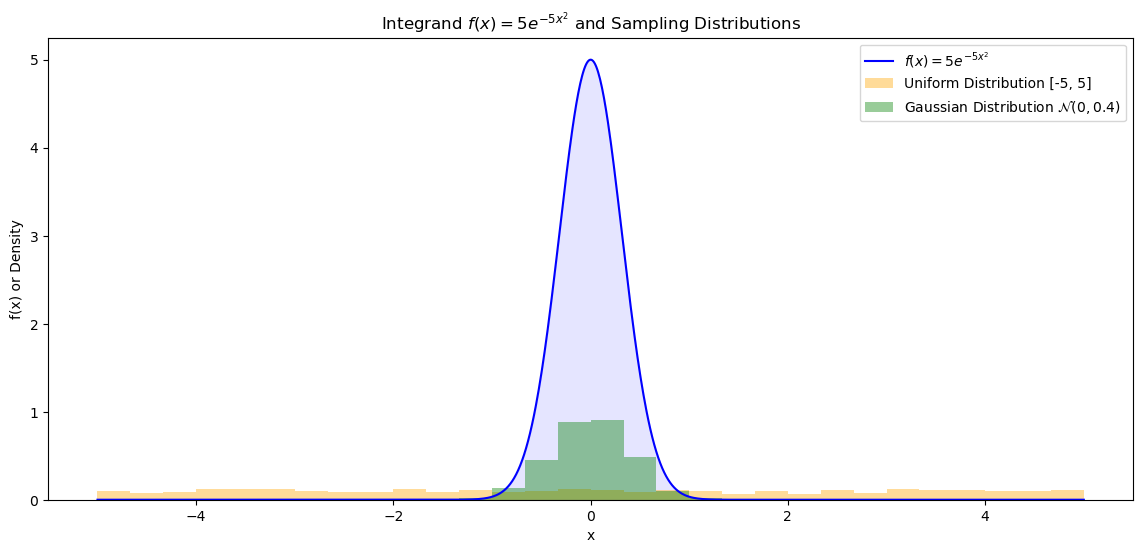

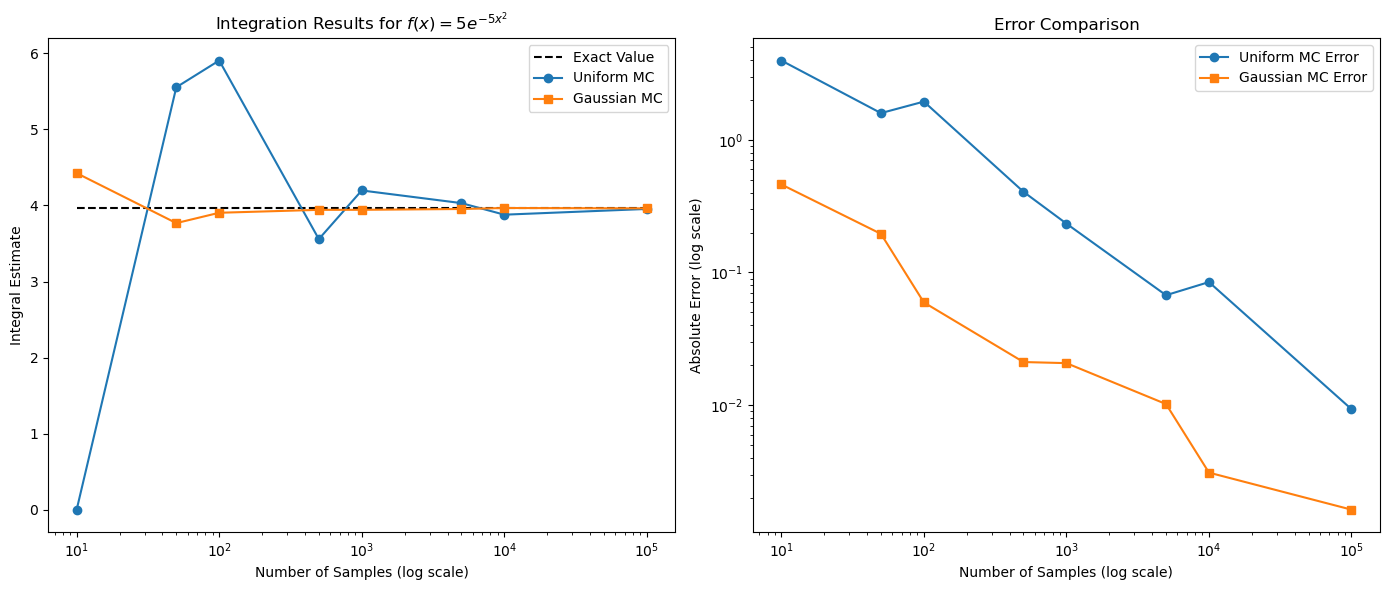

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad

A=5
B=5
# Define the integrand
def integrand(x):
    return A*np.exp(-B*x**2)

# Define the exact integral of exp(-x^2) from -infinity to infinity (for comparison)
exact_value = np.sqrt(np.pi)

def exact_integral_exp(a, b):
    """Calculate the exact integral of exp(-x^2) over [a, b] using scipy."""
    result, _ = quad(lambda x: A*np.exp(-B*x**2), a, b)
    return result

def monte_carlo_uniform_exp(a, b, N):
    """Approximate the integral of exp(-x^2) over [a, b] using Monte Carlo sampling with uniform distribution."""
    samples = np.random.uniform(a, b, N)
    f_samples = integrand(samples)
    integral = (b - a) * np.mean(f_samples)
    return integral

def monte_carlo_gaussian_exp(mu, sigma, N):
    """Approximate the integral of exp(-x^2) over [-inf, inf] using importance sampling with a Gaussian distribution."""
    samples = np.random.normal(mu, sigma, N)
    f_samples = integrand(samples)
    weights = np.exp(-samples**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi * sigma**2))  # Gaussian PDF
    integral = np.mean(f_samples / weights)
    return integral

# Set interval, number of samples, and Gaussian parameters for importance sampling
a, b = -5, 5
sample_sizes = [10, 50, 100, 500, 1000, 5000, 10000, 100000]
mu, sigma = 0, 0.4  # Gaussian centered at 0 with standard deviation 1

# Arrays to store results
exact_results = []
uniform_mc_results = []
gaussian_mc_results = []
uniform_mc_errors = []
gaussian_mc_errors = []

# Compute exact solution over the interval [a, b] for comparison
exact_result = exact_integral_exp(a, b)

# Monte Carlo integrations with both uniform and Gaussian sampling
for N in sample_sizes:
    uniform_result = monte_carlo_uniform_exp(a, b, N)
    gaussian_result = monte_carlo_gaussian_exp(mu, sigma, N)
    
    # Store results and compute errors
    uniform_mc_results.append(uniform_result)
    gaussian_mc_results.append(gaussian_result)
    uniform_mc_errors.append(abs(uniform_result - exact_result))
    gaussian_mc_errors.append(abs(gaussian_result - exact_result))

# Display results in a structured format
results_df = pd.DataFrame({
    'N (Samples)': sample_sizes,
    'Exact Result': [exact_result] * len(sample_sizes),
    'Uniform MC Result': uniform_mc_results,
    'Gaussian MC Result': gaussian_mc_results,
    'Uniform MC Error': uniform_mc_errors,
    'Gaussian MC Error': gaussian_mc_errors
})

flabel = fr'$f(x) = {A} e^{{-{B} x^2}}$'
print(f"Integration results for {flabel} over [-5, 5]:")
print(results_df)

# Plotting

# Plot the integrand f(x) and sampling distributions
plt.figure(figsize=(14, 6))

# Define the range and values of the integrand for visualization
x_vals = np.linspace(-5, 5, 1000)
y_vals = integrand(x_vals)

# Plot the integrand
plt.plot(x_vals, y_vals, 'b-', label=flabel)
plt.fill_between(x_vals, y_vals, color='blue', alpha=0.1)

# Generate sample points for the uniform and Gaussian distributions
uniform_samples = np.random.uniform(a, b, 1000)
gaussian_samples = np.random.normal(mu, sigma, 1000)

# Overlay the sampling distributions
plt.hist(uniform_samples, bins=30, range=(-5, 5), density=True, color='orange', alpha=0.4, label='Uniform Distribution [-5, 5]')
plt.hist(gaussian_samples, bins=30, range=(-5, 5), density=True, color='green', alpha=0.4, label=r'Gaussian Distribution $\mathcal{N}(0, 0.4)$')

# Labeling the plot
plt.xlabel('x')
plt.ylabel('f(x) or Density')
plt.title(f'Integrand {flabel} and Sampling Distributions')
plt.legend()
plt.show()

# Plot the integration results and errors
plt.figure(figsize=(14, 6))

# Plot the integration results
plt.subplot(1, 2, 1)
plt.plot(sample_sizes, [exact_result] * len(sample_sizes), 'k--', label='Exact Value')
plt.plot(sample_sizes, uniform_mc_results, 'o-', label='Uniform MC')
plt.plot(sample_sizes, gaussian_mc_results, 's-', label='Gaussian MC')
plt.xscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Integral Estimate')
plt.title(f'Integration Results for {flabel}')
plt.legend()

# Plot the error comparison
plt.subplot(1, 2, 2)
plt.plot(sample_sizes, uniform_mc_errors, 'o-', label='Uniform MC Error')
plt.plot(sample_sizes, gaussian_mc_errors, 's-', label='Gaussian MC Error')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Samples (log scale)')
plt.ylabel('Absolute Error (log scale)')
plt.title('Error Comparison')
plt.legend()

plt.tight_layout()
plt.show()


Recall the general formula for Monte Carlo integration includes dividing by the pdf $p(x)$ from which we are sampling, as shown below:

\begin{equation}
\int_D f(x) \, dx \approx \mathbb{E}_{x \sim p(x)} \left[ \frac{f(x)}{p(x)} \right] = \frac{1}{N} \sum_{i=1}^N \frac{f(x_i)}{p(x_i)}.
\end{equation}

### Gaussian Probability Density Function (pdf)

The pdf for a Gaussian (normal) distribution with mean $\mu$ and variance $\sigma^2$ is given by:

\begin{equation}
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( -\frac{(x - \mu)^2}{2 \sigma^2} \right).
\end{equation}


### Importance Sampling in the Context of Hamilton-Jacobi Equations

In Hamilton-Jacobi (HJ) equations, integrals often involve convolutions with a **heat kernel**, representing diffusion over time. For instance, the viscous solution $v_\delta(x, t)$ of the HJ equation can be expressed as:

\begin{equation}
v_\delta(x, t) = (2 \pi \delta t)^{-n/2} \int_{\mathbb{R}^n} \exp \left( -\frac{f(y)}{\delta} \right) \exp \left( -\frac{(x - y)^2}{2 \delta t} \right) dy,
\end{equation}

where the Gaussian term acts as a kernel centered at $x$ with variance $\delta t$. This Gaussian kernel is proportional to the **probability density function** of a normal distribution with mean $x$ and standard deviation $\sqrt{\delta t}$, which allows us to rewrite the convolution as an **expectation** over samples from a Gaussian distribution.

### Using the Heat Kernel for Expectations

Since the heat kernel corresponds to a Gaussian distribution $\mathcal{N}(x, \delta t)$, we can rewrite $\nabla v_\delta(x, t)$ as:

\begin{equation}
\nabla v_\delta(x, t) = (2 \pi \delta t)^{-n/2} \int_{\mathbb{R}^n} \frac{x - y}{\delta t} \exp \left( -\frac{(x - y)^2}{2 \delta t} \right) \exp \left( -\frac{f(y)}{\delta} \right) dy.
\end{equation}

Using this Gaussian form for sampling, we can approximate the gradient of $u_\delta(x, t)$ as:

\begin{equation}
\nabla u_\delta(x, t) = -\delta \cdot \frac{\nabla v_\delta(x, t)}{v_\delta(x, t)},
\end{equation}

where $v_\delta(x, t)$ is approximated through expectations.

### Monte Carlo Approximation for the Expectation

We can use Monte Carlo sampling to estimate these expectations by drawing samples $y \sim \mathcal{N}(x, \delta t)$. This leads to the approximation:

\begin{equation}
\nabla u_\delta(x, t) \approx \frac{1}{t} \cdot \frac{\mathbb{E}_{y \sim \mathcal{N}(x, \delta t)} \left[(x - y) \exp \left( -\frac{f(y)}{\delta} \right) \right]}{\mathbb{E}_{y \sim \mathcal{N}(x, \delta t)} \left[ \exp \left( -\frac{f(y)}{\delta} \right) \right]}
                        = \frac{1}{t} \cdot \left( x - \frac{\mathbb{E}_{y \sim \mathcal{N}(x, \delta t)} \left[(y \exp \left( -\frac{f(y)}{\delta} \right) \right]}{\mathbb{E}_{y \sim \mathcal{N}(x, \delta t)} \left[ \exp \left( -\frac{f(y)}{\delta} \right) \right]} \right),
\end{equation}

where the ratio of these expected values provides an approximation of the gradient $\nabla u_\delta(x, t)$.

Importantly, when we sample from a Gaussian $ p(x)$, the Gaussian term in the integral cancels with the gaussian pdf $p(x)$ in the denominator (recall the gneral Monte Carlo formula), simplifying the estimation.

### Practical Considerations for $t$-Dependent Sampling

The number of samples required depends on the value of $t$:
- **Small $t$**: When $t$ is small, the Gaussian kernel is sharply concentrated around $x$, so fewer samples are typically sufficient to estimate the expectation accurately.
- **Large $t$**: For larger $t$, the kernel spreads out, requiring more samples to capture the range of values effectively.

This approach enables us to approximate the solution to the HJ equation through sampling-based methods (see [20] for details on sampling techniques), where importance sampling with a Gaussian distribution centered at $x$ effectively captures the main contributions to the integral.
